In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# importing the dataset
df = pd.read_csv('bitcoin_2017_to_2023.csv')
df.head()

,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
0,2023-08-01 13:19:00,28902.48,28902.49,28902.48,28902.49,4.68658,1.354538e+05,258,0.89391,25836.224836
1,2023-08-01 13:18:00,28902.48,28902.49,28902.48,28902.49,4.77589,1.380351e+05,317,2.24546,64899.385195
2,2023-08-01 13:17:00,28908.52,28908.53,28902.48,28902.49,11.52263,3.330532e+05,451,2.70873,78290.170121
3,2023-08-01 13:16:00,28907.41,28912.74,28907.41,28908.53,15.89610,4.595556e+05,483,10.22981,295738.166916
4,2023-08-01 13:15:00,28896.00,28907.42,28893.03,28907.41,37.74657,1.090761e+06,686,16.50452,476955.246611


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3126000 entries, 0 to 3125999
Data columns (total 10 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   timestamp                     object 
 1   open                          float64
 2   high                          float64
 3   low                           float64
 4   close                         float64
 5   volume                        float64
 6   quote_asset_volume            float64
 7   number_of_trades              int64  
 8   taker_buy_base_asset_volume   float64
 9   taker_buy_quote_asset_volume  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 238.5+ MB


In [4]:
df.shape

(3126000, 10)

The timestamp column is in object format. It need to be converted into datetime format before making it as index of the dataset.

In [5]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['timestamp'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3126000 entries, 0 to 3125999
Series name: timestamp
Non-Null Count    Dtype         
--------------    -----         
3126000 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 23.8 MB


In [6]:
df.head(1)

,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
0,2023-08-01 13:19:00,28902.48,28902.49,28902.48,28902.49,4.68658,135453.793658,258,0.89391,25836.224836


In [7]:
df.set_index(df['timestamp'], inplace=True)
df.head(3)

,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
timestamp,,,,,,,,,,
2023-08-01 13:19:00,2023-08-01 13:19:00,28902.48,28902.49,28902.48,28902.49,4.68658,135453.793658,258,0.89391,25836.224836
2023-08-01 13:18:00,2023-08-01 13:18:00,28902.48,28902.49,28902.48,28902.49,4.77589,138035.087662,317,2.24546,64899.385195
2023-08-01 13:17:00,2023-08-01 13:17:00,28908.52,28908.53,28902.48,28902.49,11.52263,333053.150915,451,2.70873,78290.170121


Now the timestamp column got duplicated, we dont want that.

In [8]:
df.drop(columns='timestamp', inplace=True)
df.head(3)

,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
timestamp,,,,,,,,,
2023-08-01 13:19:00,28902.48,28902.49,28902.48,28902.49,4.68658,135453.793658,258,0.89391,25836.224836
2023-08-01 13:18:00,28902.48,28902.49,28902.48,28902.49,4.77589,138035.087662,317,2.24546,64899.385195
2023-08-01 13:17:00,28908.52,28908.53,28902.48,28902.49,11.52263,333053.150915,451,2.70873,78290.170121


About the dataset:

**Open:** The price of Bitcoin at the beginning of a specific time period (e.g., hour, day, week). It provides insight into the starting point of trading activities and can indicate the sentiment of traders at the opening of the period.

**High:** The highest price of Bitcoin reached during the same time period. This column indicates the maximum price level achieved and can reveal the peak of bullish momentum or resistance levels.

**Low:** The lowest price of Bitcoin during the same time period. It shows the minimum price level reached and can highlight support levels or the depth of bearish sentiment.

**Close:** The price of Bitcoin at the end of the time period. This is particularly significant as it reflects the sentiment of traders at the close of trading, often used as a reference point for technical analysis and decision-making.

**Volume:** The total number of Bitcoin traded during the time period. Volume indicates the level of market activity and liquidity. High volume often accompanies significant price movements, suggesting strong participation from traders.

**Quote Asset Volume:** The total value of the assets traded (e.g., in USD) during the time period. This provides insight into the monetary value of the trading activity, facilitating comparisons across different time periods and assets.

**Number of Trades:** The total number of trades executed during the time period. It reflects the frequency of trading activity and can indicate the level of market interest and participation.

**Taker Buy Base Asset Volume:** The volume of Bitcoin bought by market takers during the time period. Market takers are traders who execute orders at the current market price, indicating immediate demand.

**Taker Buy Quote Asset Volume:** The total value of Bitcoin bought by market takers (e.g., in USD) during the time period. This complements the previous column by providing insight into the monetary value of immediate demand.

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
open,3126000.0,2.008947e+04,1.605896e+04,2830.0,7624.747500,11699.990000,2.989957e+04,6.900000e+04
high,3126000.0,2.010217e+04,1.606926e+04,2830.0,7629.600000,11706.810000,2.990724e+04,6.900000e+04
low,3126000.0,2.007666e+04,1.604871e+04,2817.0,7620.000000,11692.485000,2.989051e+04,6.878670e+04
close,3126000.0,2.008946e+04,1.605896e+04,2817.0,7624.797500,11700.000000,2.989957e+04,6.900000e+04
volume,3126000.0,5.290800e+01,9.774388e+01,0.0,11.201665,23.875385,5.393630e+01,5.877775e+03
quote_asset_volume,3126000.0,1.155882e+06,2.335868e+06,0.0,112233.450737,370646.713809,1.276762e+06,1.459557e+08
number_of_trades,3126000.0,1.018583e+03,1.817813e+03,0.0,150.000000,413.000000,1.026000e+03,1.073150e+05
taker_buy_base_asset_volume,3126000.0,2.632231e+01,4.972880e+01,0.0,5.100715,11.489898,2.693009e+01,3.537453e+03
taker_buy_quote_asset_volume,3126000.0,5.727211e+05,1.193135e+06,0.0,51250.567559,175369.468433,6.210250e+05,8.947551e+07


In [10]:
# checking null values
df.isnull().sum()

open                            0
high                            0
low                             0
close                           0
volume                          0
quote_asset_volume              0
number_of_trades                0
taker_buy_base_asset_volume     0
taker_buy_quote_asset_volume    0
dtype: int64

Text(0.5, 1.0, 'High')

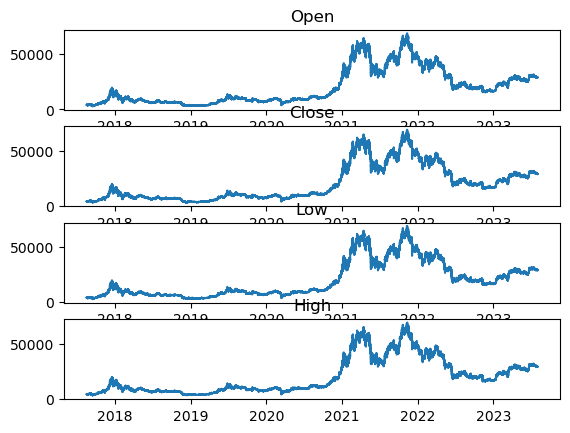

In [11]:
import seaborn as sns
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4)

ax1.plot(df.index, df['open'])
ax2.plot(df.index, df['close'])
ax3.plot(df.index, df['low'])
ax4.plot(df.index, df['high'])

ax1.set_title('Open')
ax2.set_title('Close')
ax3.set_title('Low')
ax4.set_title('High')

They show almost no trend till 2021. So, lets consider data after 2021 and visualize the trend.

In [12]:
df_2021 = df.loc['2021-01-01':'2021-12-31']
df_2022 = df.loc['2022-01-01':'2022-12-31']
df_2023 = df.loc['2023-01-01':'2023-12-31']

print('2021 :', df_2021.shape)
print('2022 :', df_2022.shape)
print('2023 :', df_2023.shape)

2021 : (524841, 9)
2022 : (526053, 9)
2023 : (306400, 9)


Records decreased from 3126000 to 500k for each dataset now.

Difference in each year sets is because of presence time factor along with dates.

As all features are showing similar trend, so let's choose 'Close' as our predictor feature.

Text(0.5, 1.0, '2023')

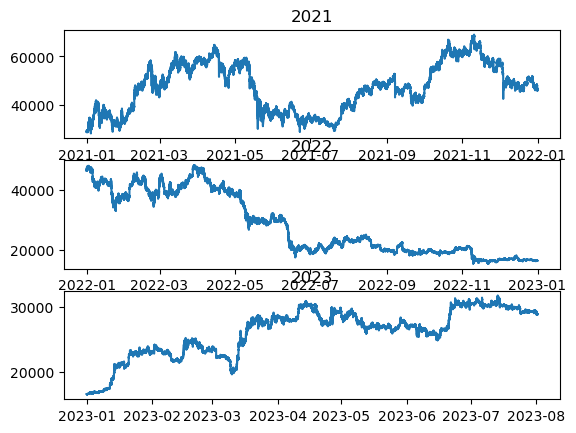

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(3)

ax1.plot(df_2021.index, df_2021['close'])
ax2.plot(df_2022.index, df_2022['close'])
ax3.plot(df_2023.index, df_2023['close'])

ax1.set_title('2021')
ax2.set_title('2022')
ax3.set_title('2023')

From above graphs: 
- 2022 is showing a negative trend. Stock prediction is helpful if we focus on the profit side. So, let's ignore that.
- Between 2021 and 2023, 2023 is showing a increasing trend than 2021.
- So, let's choose 2023 year's data for prediction.

Let's decompose the dataset first and check for seasonality.

Text(0.5, 0.98, 'Additive decomposition of Close of year 2023')

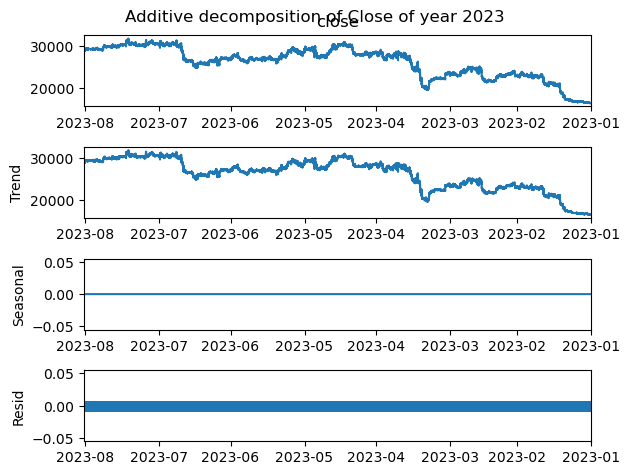

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_2023['close'], model = 'additive', period = 1)  # period 1 month
result.plot().suptitle('Additive decomposition of Close of year 2023')

No seasonal component is present. 

Now, we need to check if data is stationary or not. For this, we can perform augmented dickey fuller test. 
But our case shows memory error if we try to run augmented dickey fuller test. So, instead we can take 2 (max) differencing and plot a acfplot to check if our data is stationary or not.

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

D:\Users\Madhu\Downloads\lib\site-packages\matplotlib\axes\_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


Text(0.5, 1.0, 'Second differencing')

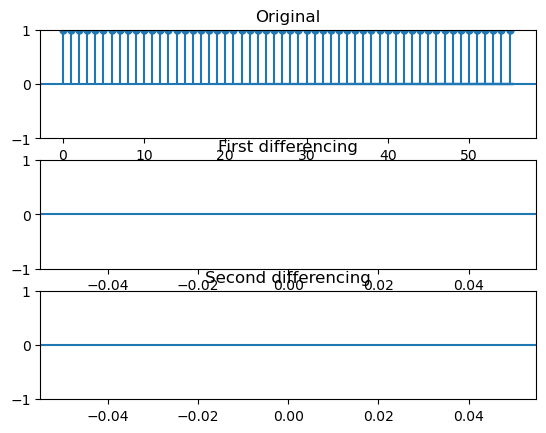

In [16]:
fig, (ax1, ax2, ax3) = plt.subplots(3)
plot_acf(df_2023['close'], ax=ax1)
plot_acf(df_2023['close'].diff(), ax=ax2)
plot_acf(df_2023['close'].diff().diff(), ax=ax3)

ax1.set_title('Original')
ax2.set_title('First differencing')
ax3.set_title('Second differencing')

From above graph, data is stationary at d = 0. So, either we can use ARMA model or ARIMA model with d = 0.

D:\Users\Madhu\Downloads\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


Text(0.5, 1.0, 'Second differencing')

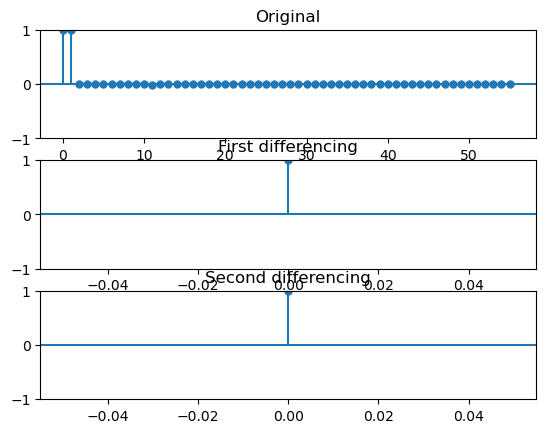

In [17]:
fig, (ax1, ax2, ax3) = plt.subplots(3)
plot_pacf(df_2023['close'], ax=ax1)
plot_pacf(df_2023['close'].diff(), ax=ax2)
plot_pacf(df_2023['close'].diff().diff(), ax=ax3)

ax1.set_title('Original')
ax2.set_title('First differencing')
ax3.set_title('Second differencing')

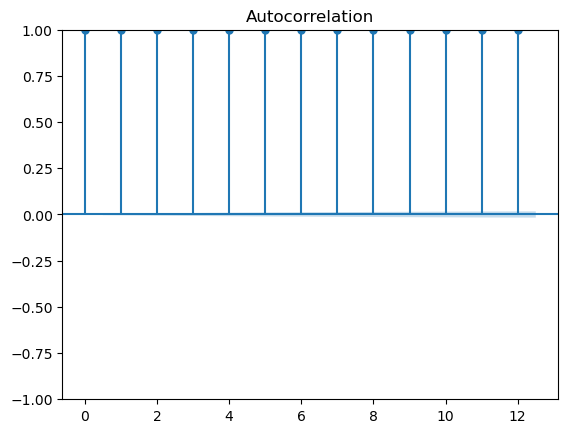

<Figure size 1200x1000 with 0 Axes>

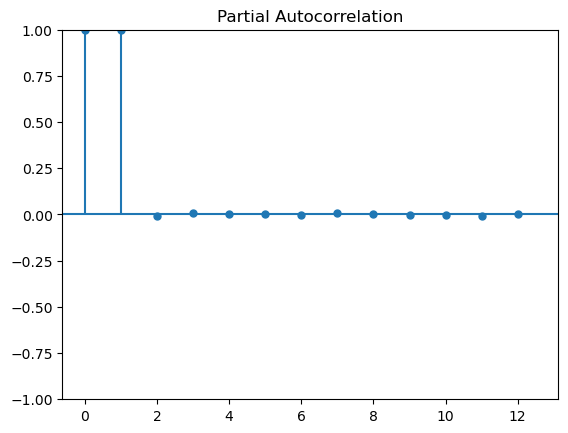

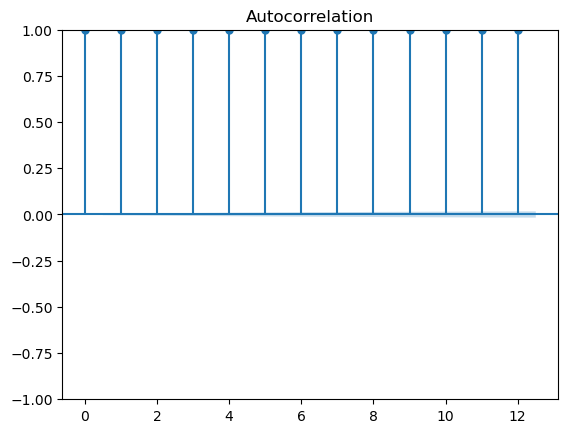

In [18]:
plt.figure(figsize = (12,10))
plot_pacf(df_2023['close'], lags = 12)
plot_acf(df_2023['close'], lags = 12)

From above plots, it is hard to calculate q value. 

p = 1, q = 12(approximately)

Let's use these values of p,d,q and apply ARIMA model to the dataset.

In [25]:
traindata = df_2023.tail(30)[:15]
testdata = df_2023.tail(30)[15:]

print('traindata :', traindata.shape)
print('testdata :',testdata.shape)

traindata : (15, 9)
testdata : (15, 9)


In [20]:
from statsmodels.tsa.arima.model import ARIMA

In [26]:
model = ARIMA(traindata['close'], order=(1,0,12))
model_fit = model.fit()

D:\Users\Madhu\Downloads\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Users\Madhu\Downloads\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Users\Madhu\Downloads\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Users\Madhu\Downloads\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Users\Madhu\Downloads\lib\site-

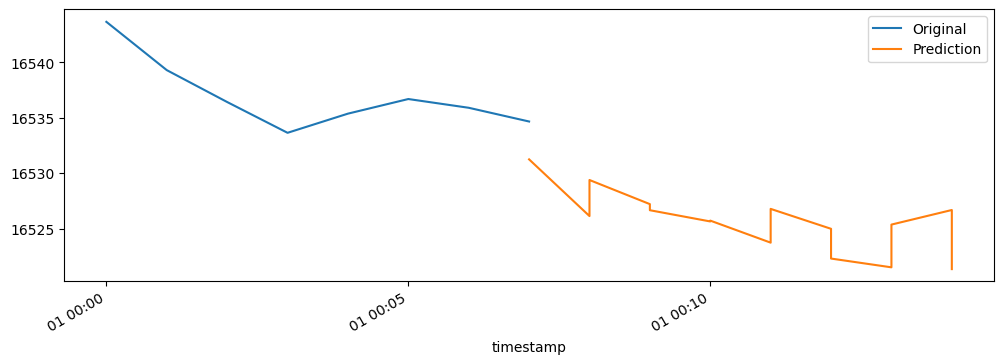

In [28]:
predictions = model_fit.predict()

plt.figure(figsize=(12,4))
testdata['close'].plot(kind='line',label='Original')
predictions.plot(kind='line',label='Prediction')
plt.legend()